In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

In [4]:
# 读取原数据数集
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
#读取清洗过的数据集
data = pd.read_csv('clear_data.csv')
data.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            0       3  22.0      1      0   7.2500           0         1   
1            1       1  38.0      1      0  71.2833           1         0   
2            2       3  26.0      0      0   7.9250           1         0   
3            3       1  35.0      1      0  53.1000           1         0   
4            4       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [7]:
data.shape

(891, 11)

In [9]:
X = data
y = train['Survived']

In [12]:
from sklearn.model_selection import train_test_split

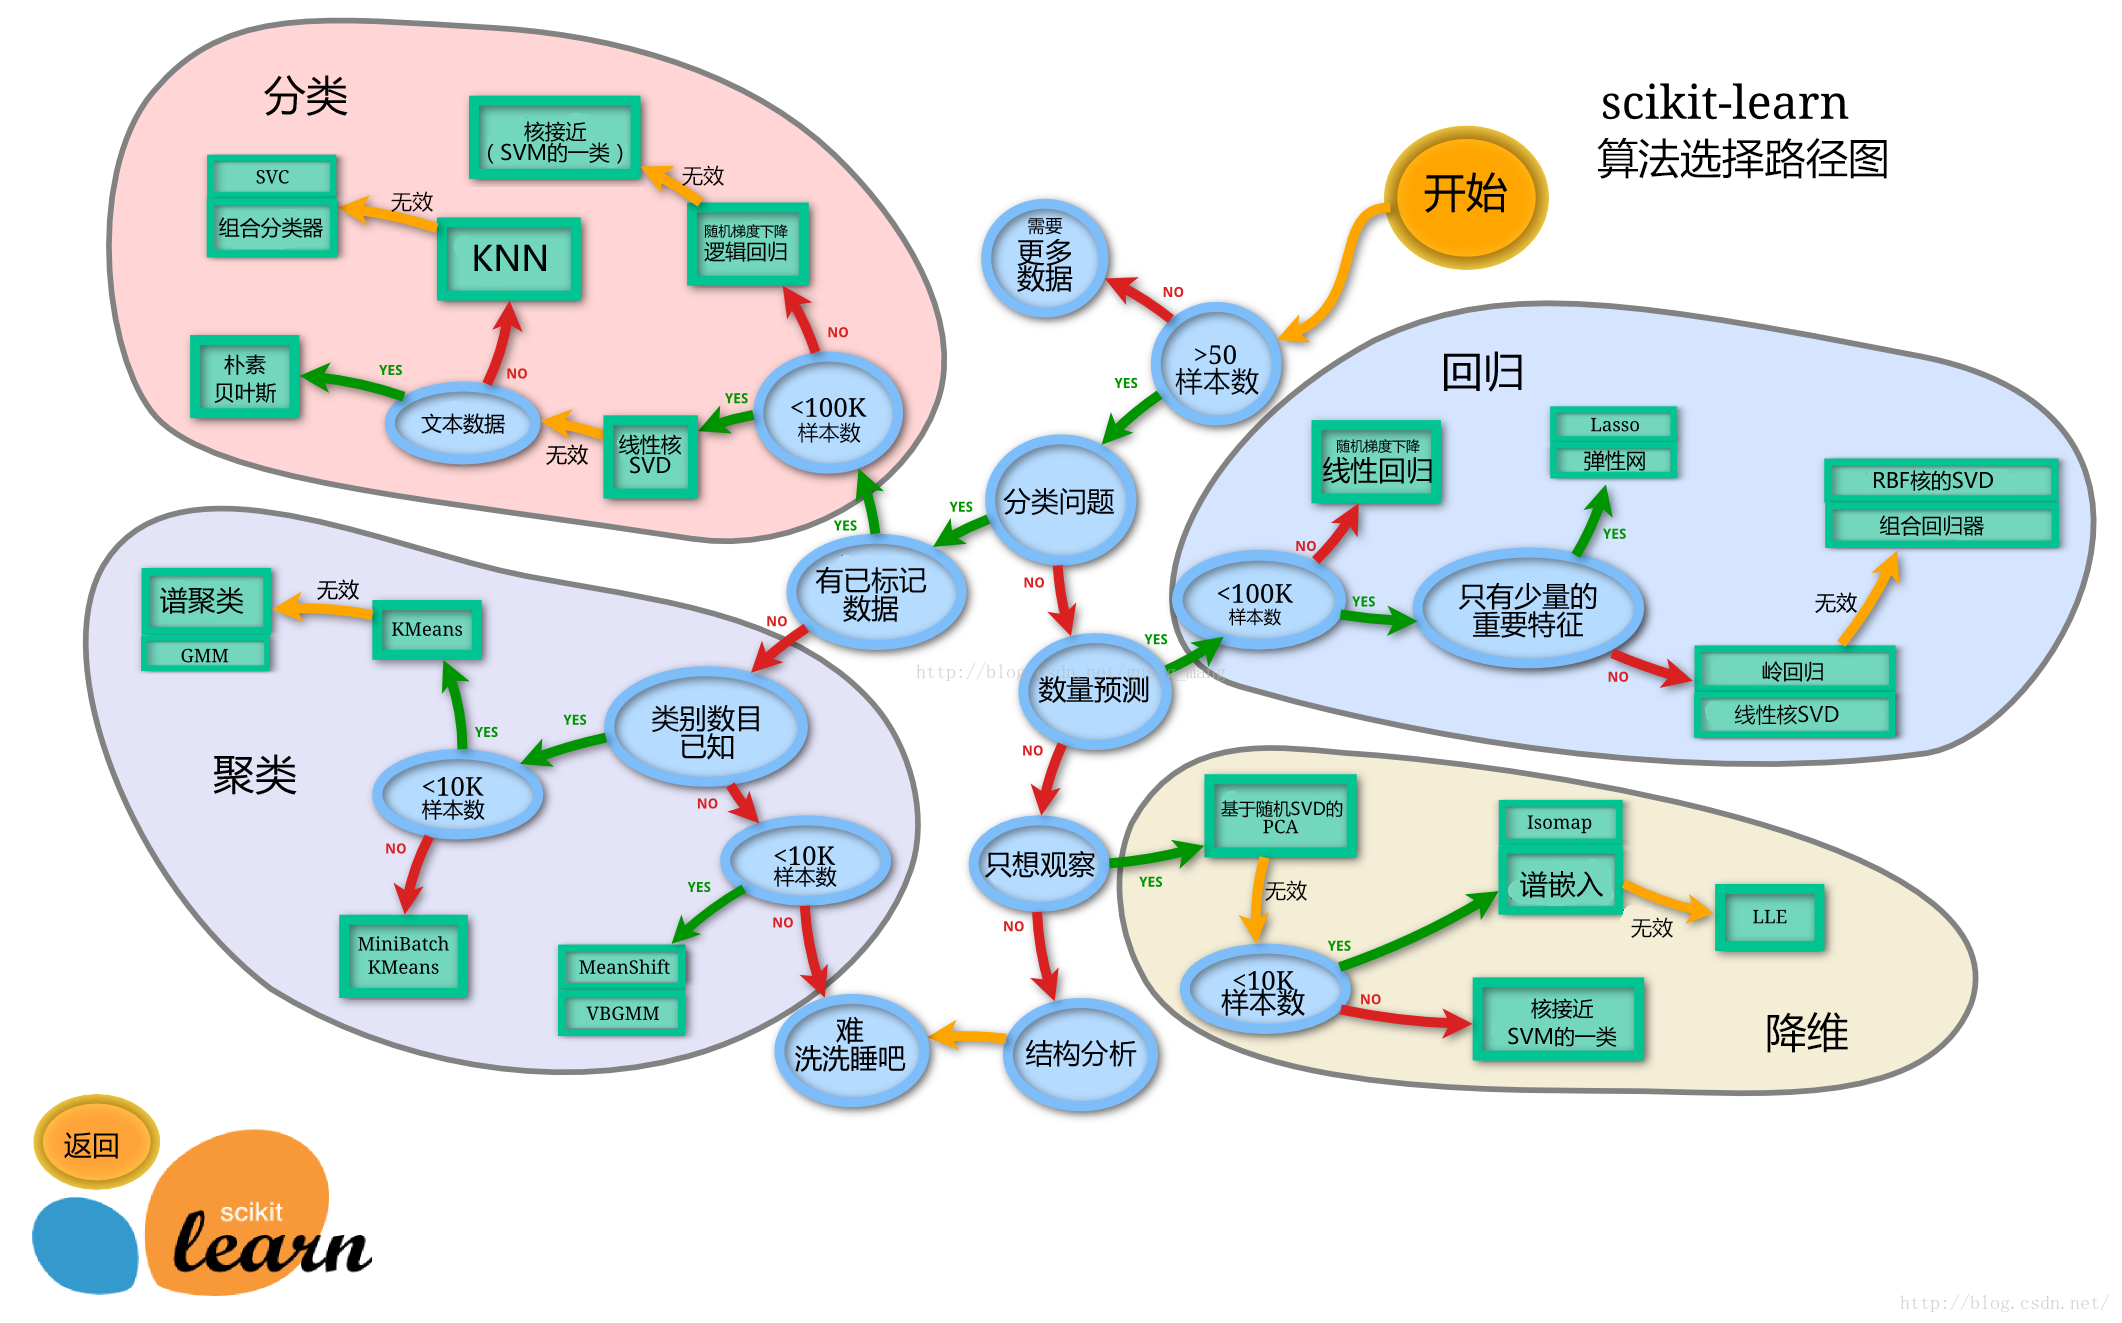

In [11]:
Image('sklearn.png')

In [13]:
train_test_split?

In [23]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [17]:
# 查看数据形状
X_train.shape, X_test.shape

((668, 11), (223, 11))

In [24]:
X_train.head()

PassengerId  Pclass   Age  SibSp  Parch    Fare  Sex_female  Sex_male  \
486          486       1  35.0      1      0  90.000           1         0   
238          238       2  19.0      0      0  10.500           0         1   
722          722       2  34.0      0      0  13.000           0         1   
184          184       3   4.0      0      2  22.025           1         0   
56            56       2  21.0      0      0  10.500           1         0   

     Embarked_C  Embarked_Q  Embarked_S  
486           0           0           1  
238           0           0           1  
722           0           0           1  
184           0           0           1  
56            0           0           1

In [25]:
from sklearn.linear_model import LogisticRegression   #线性模型
from sklearn.ensemble import RandomForestClassifier   #树模型

In [26]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
# 线性模型
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
lr

LogisticRegression()

In [29]:
lr.score(X_train, y_train)

0.8023952095808383

In [30]:
print('训练集得分：{:.3f}'.format(lr.score(X_train, y_train)))

训练集得分：0.802


In [31]:
print('训练集得分：{:.3f}'.format(lr.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(lr.score(X_test, y_test)))

训练集得分：0.802
测试集得分：0.776


In [46]:
lr1 = LogisticRegression(C=8).fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(lr1.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(lr1.score(X_test, y_test)))

训练集得分：0.807
测试集得分：0.785


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
lr2 = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(lr2.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(lr2.score(X_test, y_test)))

训练集得分：0.787
测试集得分：0.771


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# 决策树模型
rf = RandomForestClassifier().fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(rf.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(rf.score(X_test, y_test)))

训练集得分：1.000
测试集得分：0.803


In [49]:
rf1 = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(rf1.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(rf1.score(X_test, y_test)))

训练集得分：1.000
测试集得分：0.789


In [51]:
rf2 = RandomForestClassifier(n_estimators=100,max_depth=5).fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(rf2.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(rf2.score(X_test, y_test)))

训练集得分：0.864
测试集得分：0.794


In [52]:
rf3 = RandomForestClassifier(bootstrap = False).fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(rf3.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(rf3.score(X_test, y_test)))

训练集得分：1.000
测试集得分：0.762


In [53]:
rf4 = RandomForestClassifier(oob_score = True).fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(rf4.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(rf4.score(X_test, y_test)))

训练集得分：1.000
测试集得分：0.794


In [55]:
# 模型训练结果
lr.predict(X_train)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [56]:
#模型训练的百分比结果
lr.predict_proba(X_train)

array([[0.08556061, 0.91443939],
       [0.78963763, 0.21036237],
       [0.80020178, 0.19979822],
       ...,
       [0.54651935, 0.45348065],
       [0.70957362, 0.29042638],
       [0.87571017, 0.12428983]])